In [8]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ann = [
                0.65642954,
                0.4285264,
                0.25816318,
                0.29223176
            ]

In [5]:
img = cv2.imread("data/temp_test/stop/0a9beb69-0b62-412c-8e5a-c6b28fc87e11.jpg")
image_width, image_height = img.shape[1], img.shape[0]
x, y, width, height = ann[0], ann[1], ann[2], ann[3]

x_pixel = int(x * image_width)
y_pixel = int(y * image_height)
width_pixel = int(width * image_width)
height_pixel = int(height * image_height)

In [6]:
img = cv2.rectangle(img, (x_pixel, y_pixel), (x_pixel + width_pixel, y_pixel + height_pixel), (0, 255, 0), 2)

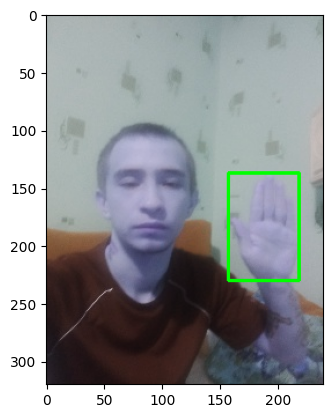

In [9]:
plt.imshow(img)